In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.facecolor'] = 'w'

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Load in Data

In [2]:
# import from google
 from google.colab import drive
 drive.mount('/content/drive', force_remount= False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#file for data
hr_file = '/content/drive/My Drive/Unit 2/Project 3/hr-data.csv'

In [0]:
# load csv data into train and test df
train_df = pd.read_csv(hr_file)

## Data Overview

In [5]:
# Check shape of df
train_df.shape

(14999, 11)

In [6]:
train_df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
train_df.tail()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,14998,0.37,0.52,2,158,3,0,1,0,support,low


In [8]:
#Check columns in df
train_df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [0]:
# Sales column == Department
train_df = train_df.rename(columns={'sales':'dept', 'average_montly_hours':'average_monthly_hours'})

In [10]:
# Check number of unique values in each column to classify variables
train_df[train_df.columns].nunique()

id                       14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_monthly_hours      215
time_spend_company           8
Work_accident                2
churn                        2
promotion_last_5years        2
dept                        10
salary                       3
dtype: int64

In [11]:
train_df.dtypes

id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
churn                      int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
id                       14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


What do we know about data
* dataset has 14999 employees
* no null/missing values
* 10 attributes
  * id
  * satisfaction level: ranges from 0-1, how satified employee is at company
  * last evaluation: ranges from 0-1, performance eval by employer
  * number projects: number of projects assigned to an employee
  * average monthly hours:  average number of hours employee works in a month
  * time spent company: number of years at company
  * work accident: whether employee has had accident or not
  * Churn: whether employee has left the company or not
  * promotion last 5 years: whether employee has had a promotion in the last 5 years
  * dept: employee's department
  * Salary: employees salary level
  


In [13]:
for column in train_df.columns:
  print(column)
  print (train_df[column].unique())
  print()

id
[    0     1     2 ... 14996 14997 14998]

satisfaction_level
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]

last_evaluation
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]

number_project
[2 5 7 6 4 3]

average_monthly_hours
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 25

Categorical = Ordinal or Nominal/Binary

Variables (Categorical vs. Numerical (discrete, continuous) )

id - Categorical

satisfaction level - Numerical

last eval - Numerical

number projects - Numerical

avg monthly hours - Numerical

work accident - Categorical - Nominal

time spent at company - Numerical

churn - Target 

promotion in last 5 years - Categorical - Nominal

department - Categorical - Nominal 

salary - Categorical - Ordinal

In [14]:
train_df.groupby('promotion_last_5years')[train_df.columns].count()

,id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary
promotion_last_5years,,,,,,,,,,,
0,14680,14680,14680,14680,14680,14680,14680,14680,14680,14680,14680
1,319,319,319,319,319,319,319,319,319,319,319


In [15]:
train_df.groupby('churn')[train_df.columns].mean()

,id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
churn,,,,,,,,,
0,7811.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,6499.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


* can tell that people who churn often had low satisfaction levels, and low promotion rates

In [16]:
train_df.describe()

,id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3749.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7499.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11248.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
train_df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [0]:
categorical_var =[
                  'Work_accident',
                  'promotion_last_5years',
                  'IT',
                  'RandD',
                  'accounting',
                  'hr',
                  'management',
                  'marketing',
                  'product_mng',
                  'sales',
                  'support',
                  'technical',
                  'salary_dummy'
]

ordinal_var = ['salary']
numerical_var = [
                 'satisfaction_level',
                 'last_evaluation',
                 'number_project',
                 'average_monthly_hours',
                 'time_spend_company'
]
target = ['churn']

In [19]:
train_df[numerical_var].describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [20]:
train_df[train_df.isnull() == False]

,id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
5,5,0.41,0.50,2,153,3,0,1,0,sales,low
6,6,0.10,0.77,6,247,4,0,1,0,sales,low
7,7,0.92,0.85,5,259,5,0,1,0,sales,low
8,8,0.89,1.00,5,224,5,0,1,0,sales,low
9,9,0.42,0.53,2,142,3,0,1,0,sales,low


### Graphs
* Histograms numerical columns
* Bar Plots categorical columns

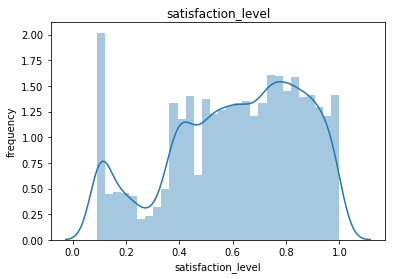

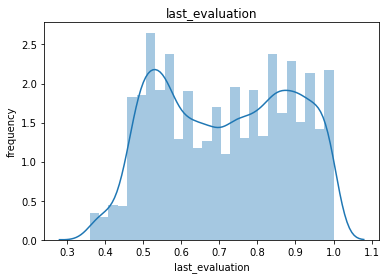

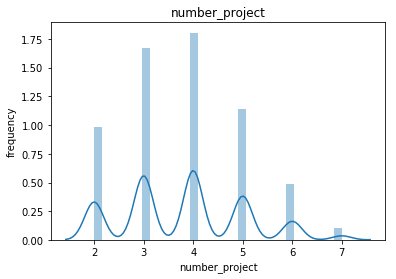

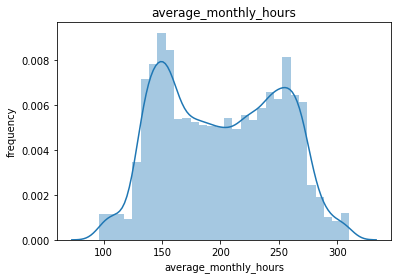

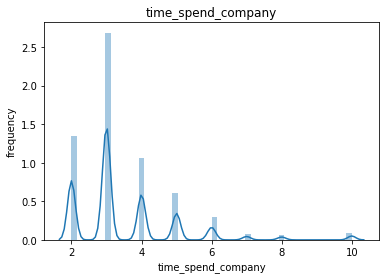

In [21]:
for column in numerical_var:
  sns.distplot(train_df[column])
  plt.title(f'{column}')
  plt.ylabel('frequency')

  plt.show()

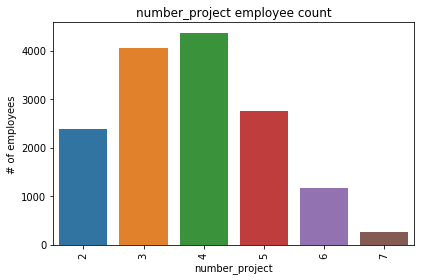

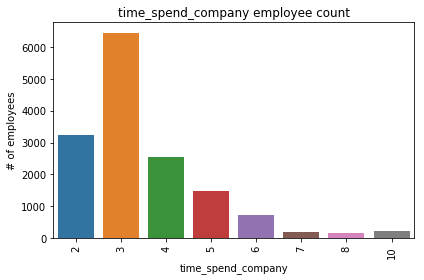

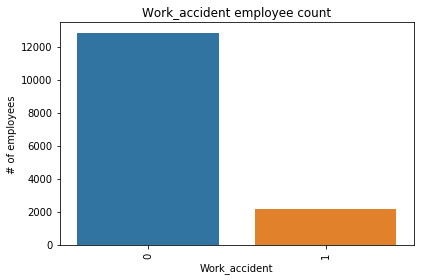

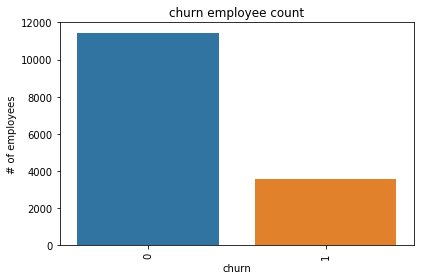

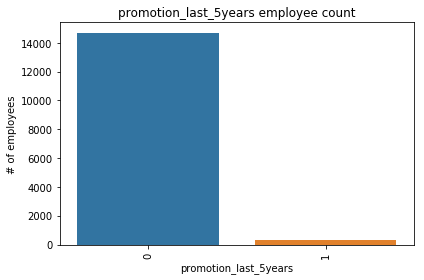

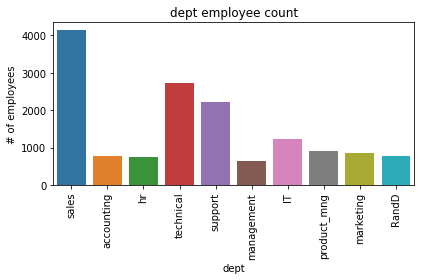

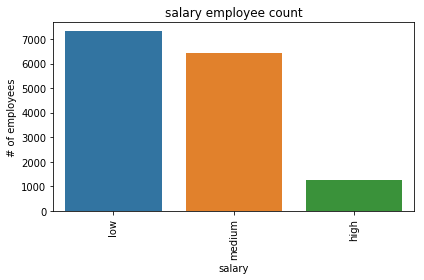

In [22]:
# Using a for loop created a bar graph visualizing the data
OG_Columns = ['number_project', 'time_spend_company', 'Work_accident', 'churn', 'promotion_last_5years', 'dept', 'salary']
for column in OG_Columns:
  sns.countplot(train_df[column])
  plt.title(f'{column} employee count')
  plt.ylabel('# of employees')
  plt.xticks(rotation = 90)
  
  plt.tight_layout()

  plt.show()

* Shows that:
  * most employees get abut 3-5 projects
  * most employees have sent < 4 years at the company
  * most employess have not had a work accident
  * most employees have not churned
  * most employees have not recieved a promotion in the last 5 years
  * highest number of employees in sales, technical, support, and IT
  * most employees are in the low salary category

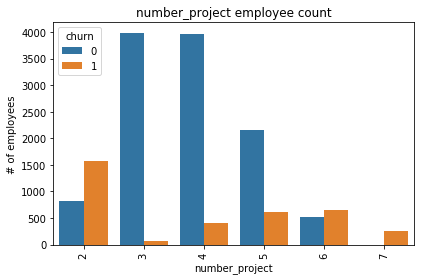

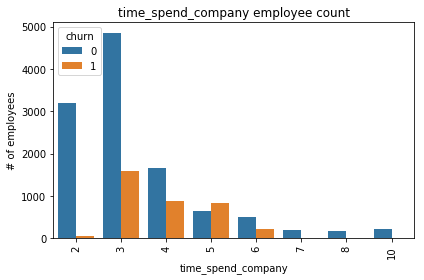

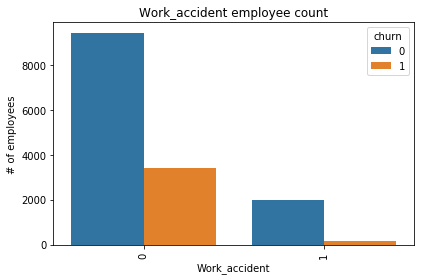

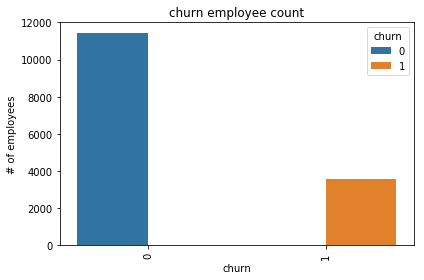

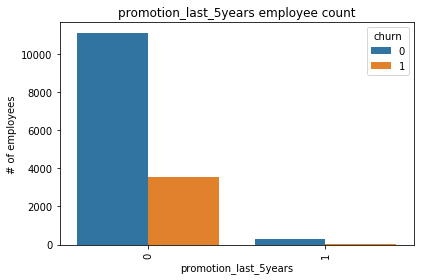

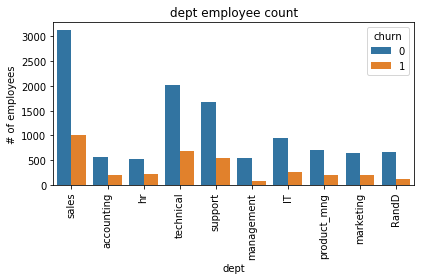

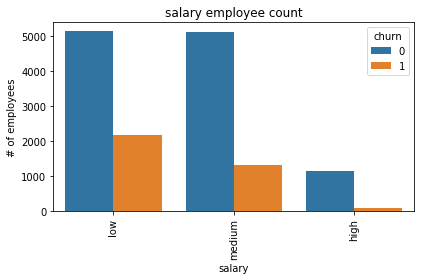

In [23]:
for column in OG_Columns:
  sns.countplot(train_df[column], hue= train_df['churn'])
  plt.title(f'{column} employee count')
  plt.ylabel('# of employees')
  plt.xticks(rotation = 90)
  
  plt.tight_layout()

  plt.show()

* Shows that:
  * churn > no churn when employees get 2, 6, 7 projects
  * churn > no churn spend 5 years at the company
  * churn is higher when no accidents, no promotion
  * churn higher in departments: sales, technical, support, IT
  * churn higher in low salary category

### Dummy out salary and dept

In [0]:
salary_series = pd.Series(['low','medium','high'])

In [25]:
salary_series

0       low
1    medium
2      high
dtype: object

In [26]:
salary_series.map({
    'low':1,
    'medium':2,
    'high':3
})

0    1
1    2
2    3
dtype: int64

In [0]:
train_df['salary_dummy'] = train_df['salary'].map({
    'low':0,
    'medium':1,
    'high':2
})

In [28]:
train_df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [0]:
# when dummying out depart
train_df = pd.concat([train_df, pd.get_dummies(train_df['dept'])], axis = 1)

In [30]:
# Check
train_df.head()

,id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,salary_dummy,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0


## Logistic Regression on all variables

In [31]:
numerical_var

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company']

In [32]:
categorical_var

['Work_accident',
 'promotion_last_5years',
 'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical',
 'salary_dummy']

In [0]:
#Set variables 
x1 = train_df[numerical_var + categorical_var]
y1 = train_df['churn']

In [0]:
# Test train split
x1_train, x1_val, y1_train, y1_val = train_test_split(x1,
                                                      y1,
                                                      test_size = 0.2,
                                                      random_state =42)

In [0]:
# Set transformer
clf1_transformer = ColumnTransformer(transformers=
                                     [('scaler', MinMaxScaler(), numerical_var)],
                                     remainder = 'passthrough',
                                     verbose =True)

In [36]:
clf1_transformer.get_params()

{'n_jobs': None,
 'remainder': 'passthrough',
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('scaler',
   MinMaxScaler(copy=True, feature_range=(0, 1)),
   ['satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_monthly_hours',
    'time_spend_company'])],
 'verbose': True}

In [37]:
# Fit Transformer
clf1_transformer.fit(x1_train)

[ColumnTransformer] ........ (1 of 2) Processing scaler, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['satisfaction_level', 'last_evaluation',
                                  'number_project', 'average_monthly_hours',
                                  'time_spend_company'])],
                  verbose=True)

In [0]:
x1_train_transform = clf1_transformer.transform(x1_train)
x1_val_transform = clf1_transformer.transform(x1_val)

In [0]:
clf1 = LogisticRegression(penalty = 'none',
                          solver = 'lbfgs',
                          class_weight = ' balanced',
                          verbose = 1)

In [40]:
clf1.fit(x1_train_transform, y1_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=' balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=1, warm_start=False)

In [0]:
y1_train_pred = clf1.predict(x1_train_transform)
y1_val_pred = clf1.predict(x1_val_transform)

In [0]:
y1_train_pred_proba = clf1.predict_proba(x1_train_transform)
y1_val_pred_proba = clf1.predict_proba(x1_val_transform)

In [43]:
clf1.score(x1_train_transform,y1_train)

0.7956496374697891

In [44]:
clf1.score(x1_val_transform,y1_val)

0.7886666666666666

In [45]:
recall_score(y1_train, y1_train_pred)

0.37207678883071554

In [46]:
recall_score(y1_val, y1_val_pred)

0.3526912181303116

In [47]:
f1_score(y1_train, y1_train_pred)

0.4650959860383944

In [48]:
f1_score(y1_val, y1_val_pred)

0.43992932862190814

In [49]:
clf1.classes_

array([0, 1])

In [50]:
clf1.coef_

array([[-3.80025324,  0.42159844, -1.53825456,  1.06577537,  2.11548799,
        -1.51755991, -1.41991642,  0.01044385, -0.51876943,  0.15431726,
         0.45213426, -0.38863744,  0.19489803,  0.08427263,  0.12713301,
         0.18599744,  0.24413142, -0.68063933]])

In [51]:
clf1.intercept_

array([0.54592103])

In [52]:
(clf1.coef_).shape

(1, 18)

In [53]:
x1_train.columns.shape

(18,)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

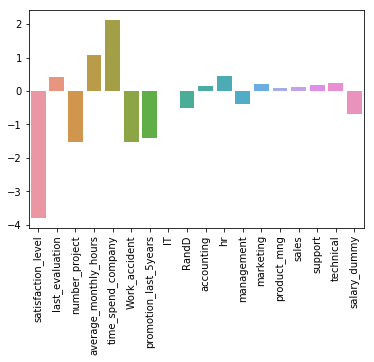

In [54]:
sns.barplot(x1_train.columns, clf1.coef_[0])

plt.xticks(rotation = 90)

In [55]:
pd.DataFrame((clf1.coef_[0]).round(2), x1_train.columns, columns=['coef'])

,coef
satisfaction_level,-3.80
last_evaluation,0.42
number_project,-1.54
average_monthly_hours,1.07
time_spend_company,2.12
Work_accident,-1.52
promotion_last_5years,-1.42
IT,0.01
RandD,-0.52
accounting,0.15


### Summary of Significant Variables

* Using coefficients we can see which variables have a strong impact on churn

* These variables include (in order of greatest magnitude to lowest):
 
  * Satisfaction level (-3.81)
  
  > *the higher their satisfaction level, the less likely they are to churn*

  * Time Spend in company (1.92)

  > *the more time spent at company, the more likely to churn*

  * Promotion in the last 5 years (-1.61)

  > *the more promotions, the less likely to churn*
  
  * Number of projects (-1.52)

  > *The more projects, the less likely they are to churn*
  
  * Work Accident (-1.47)

  > *the more work accidents, the less likely they are to churn (questionable)*
  
  * Average Monthly Hours (1.03)

  > *the more monthly hours, the more likely to churn*
  
  * Departments: Management (-0.64), RandD (-0.53) 

  > *people in these departments, are less likely to churn*
  
  * Last Evaluation (0.46)

  > *the lower the evaluation the less likely to churn*

## Numerical Variables

### Decision Tree


In [0]:
x_dt = train_df[numerical_var]
y_dt = train_df['churn']

In [0]:
# train test split

x_dt_train, x_dt_val, y_dt_train, y_dt_val = train_test_split(x_dt,
                                                              y_dt,
                                                              test_size = 0.2,
                                                              random_state = 42)

In [0]:
# Create model
dt = DecisionTreeClassifier(max_features= None, random_state= 42)

In [59]:
dt.fit(x_dt_train, y_dt_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [0]:
def tree_model_image(model, column_names):
  '''
  This function takes inputs of decision tree classifiers and column names of the 
  independent varibles & outputs the tree image of the model
  '''
  assert isinstance(model, DecisionTreeClassifier), "Please inpur DecisionTreeClassifier"

  dot_data = StringIO()

  export_graphviz(model,
                feature_names = column_names,
                out_file = dot_data,
                filled = True,
                rounded = True,
                special_characters = True)
  
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  display(Image(graph.create_png()))

In [62]:
tree_model_image(dt, x_dt.columns)

Output hidden; open in https://colab.research.google.com to view.

In [63]:
print(classification_report(y_dt_train, dt.predict(x_dt_train)))
print(classification_report(y_dt_val, dt.predict(x_dt_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9134
           1       1.00      1.00      1.00      2865

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2294
           1       0.94      0.96      0.95       706

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [64]:
dt.feature_importances_

array([0.50381347, 0.15429739, 0.10366399, 0.09750819, 0.14071696])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

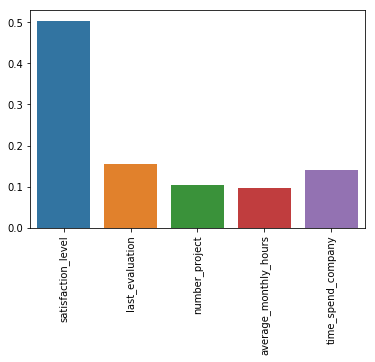

In [65]:
sns.barplot(x_dt.columns, dt.feature_importances_)
plt.xticks(rotation =90)

In [66]:
dt.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

### Churn Split Comparisons

In [67]:
train_df['churn'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: churn, dtype: float64

23 % churn

In [68]:
train_df.loc[train_df['satisfaction_level'] <= 0.5, 'churn'].value_counts(normalize = True)

1    0.529925
0    0.470075
Name: churn, dtype: float64

In [69]:
train_df.loc[train_df['satisfaction_level'] <= 0.12, 'churn'].value_counts(normalize = True)

1    0.971678
0    0.028322
Name: churn, dtype: float64

* More people churning at satisfaction levels < 0.44
* Churning highest between 0.44 and 0.5


In [70]:
train_df.loc[train_df['number_project'] >= 3, 'churn'].value_counts(normalize = True)

0    0.841091
1    0.158909
Name: churn, dtype: float64

In [71]:
train_df.loc[train_df['number_project'] <= 2, 'churn'].value_counts(normalize = True)

1    0.656198
0    0.343802
Name: churn, dtype: float64

* More people churn when they do less than 2 projects (0.65 vs. 0.15)
* Churn increases, the fewer projects people do


In [72]:
train_df.loc[train_df['time_spend_company'] >= 3, 'churn'].value_counts(normalize = True)

0    0.700723
1    0.299277
Name: churn, dtype: float64

In [73]:
train_df.loc[train_df['time_spend_company'] >= 5, 'churn'].value_counts(normalize = True)

0    0.621779
1    0.378221
Name: churn, dtype: float64

* Max people churning when people spent more than 5

In [74]:
train_df.loc[train_df['average_monthly_hours'] >= 280, 'churn'].value_counts(normalize = True)

1    0.781726
0    0.218274
Name: churn, dtype: float64

In [75]:
train_df.loc[train_df['average_monthly_hours'] >= 287, 'churn'].value_counts(normalize = True)

1    0.963889
0    0.036111
Name: churn, dtype: float64

* Max peopl churning when average monthly hours > 0.96

In [76]:
train_df.loc[train_df['last_evaluation'] >= 0.8, 'churn'].value_counts(normalize = True)

0    0.696516
1    0.303484
Name: churn, dtype: float64

In [77]:
train_df.loc[train_df['last_evaluation'] >= 0.83, 'churn'].value_counts(normalize = True)

0    0.680408
1    0.319592
Name: churn, dtype: float64

* Max people churning at evalutions > 0.83

### Pocket Group of Churners
* Satisfaction level < 0.12

* Number of Projects < 2

* Time spend at Company > 5 years

* Average monthly hours > 287 hours

* Last Eval > 0.83 

## Categorical Variables

### Decision Tree


In [0]:
x_dt2 = train_df[categorical_var]
y_dt2 = train_df['churn']

In [0]:
# train test split

x_dt2_train, x_dt2_val, y_dt2_train, y_dt2_val = train_test_split(x_dt2,
                                                              y_dt2,
                                                              test_size = 0.2,
                                                              random_state = 42)

In [0]:
# Create model
dt2 = DecisionTreeClassifier(max_features= None, random_state= 42)

In [81]:
dt2.fit(x_dt2_train, y_dt2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

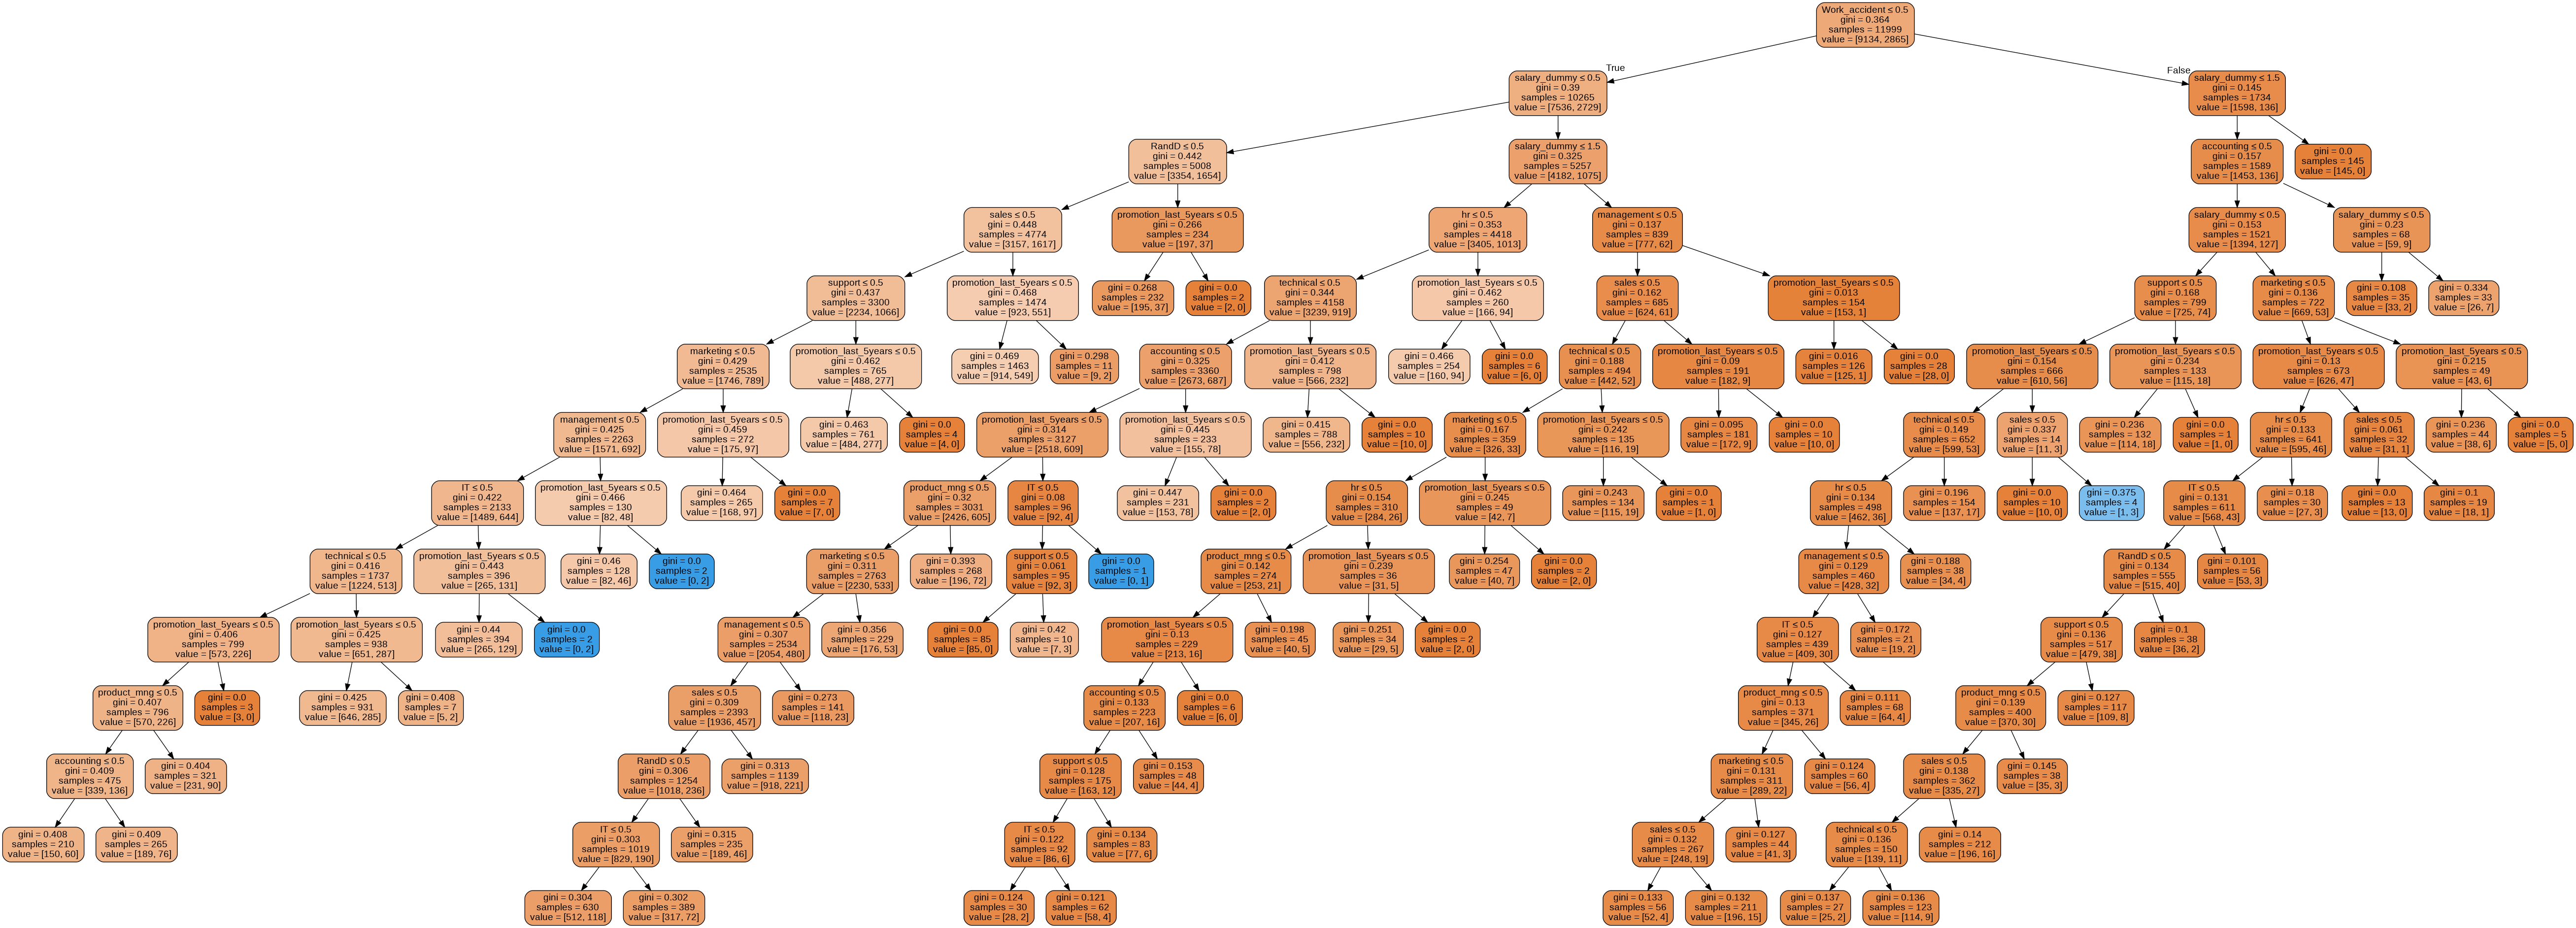

In [82]:
tree_model_image(dt2, x_dt2.columns)

In [83]:
dt2.feature_importances_

array([0.33613449, 0.05554462, 0.00877146, 0.04713278, 0.02847527,
       0.03241325, 0.00986878, 0.00820581, 0.00950867, 0.03059189,
       0.01691424, 0.03505023, 0.3813885 ])

In [84]:
dt2.feature_importances_.sum()

1.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

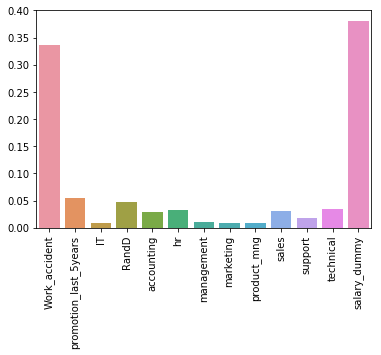

In [85]:
sns.barplot(x_dt2.columns, dt2.feature_importances_)
plt.xticks(rotation =90)

In [86]:
dt2.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

### Churn Split Comparisons

In [87]:
train_df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'dept', 'salary', 'salary_dummy', 'IT',
       'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng',
       'sales', 'support', 'technical'],
      dtype='object')

In [88]:
train_df['churn'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: churn, dtype: float64

In [89]:
train_df.loc[train_df['Work_accident'] == 1, 'churn'].value_counts(normalize = True)

0    0.922084
1    0.077916
Name: churn, dtype: float64

In [90]:
train_df.loc[train_df['Work_accident'] == 0, 'churn'].value_counts(normalize = True)

0    0.73484
1    0.26516
Name: churn, dtype: float64

* Higher percentage of people churning when there are no work accidents

In [91]:
train_df.loc[train_df['salary_dummy'] >= 1, 'churn'].value_counts(normalize = True)

0    0.81791
1    0.18209
Name: churn, dtype: float64

In [92]:
train_df.loc[train_df['salary_dummy'] >= 2, 'churn'].value_counts(normalize = True)

0    0.933711
1    0.066289
Name: churn, dtype: float64

In [93]:
train_df.loc[train_df['salary_dummy'] == 3, 'churn'].value_counts(normalize = True)

Series([], Name: churn, dtype: float64)

* Higher percentage of people churning at low salaries

In [94]:
train_df.loc[train_df['promotion_last_5years'] == 0 , 'churn'].value_counts(normalize = True)

0    0.758038
1    0.241962
Name: churn, dtype: float64

In [95]:
train_df.loc[train_df['promotion_last_5years'] == 1 , 'churn'].value_counts(normalize = True)

0    0.940439
1    0.059561
Name: churn, dtype: float64

* Higher percentage people churning who haven't had a promotion

In [96]:
train_df.loc[train_df['RandD'] == 0 , 'churn'].value_counts(normalize = True)

0    0.757247
1    0.242753
Name: churn, dtype: float64

In [97]:
train_df.loc[train_df['RandD'] == 1 , 'churn'].value_counts(normalize = True)

0    0.846252
1    0.153748
Name: churn, dtype: float64

Comment: 

In [98]:
train_df.loc[train_df['management'] == 0 , 'churn'].value_counts(normalize = True)

0    0.757812
1    0.242188
Name: churn, dtype: float64

In [99]:
train_df.loc[train_df['management'] == 1 , 'churn'].value_counts(normalize = True)

0    0.855556
1    0.144444
Name: churn, dtype: float64

Comment: 

In [100]:
train_df.loc[train_df['IT'] == 0 , 'churn'].value_counts(normalize = True)

0    0.760529
1    0.239471
Name: churn, dtype: float64

In [101]:
train_df.loc[train_df['IT'] == 1 , 'churn'].value_counts(normalize = True)

0    0.777506
1    0.222494
Name: churn, dtype: float64

* About the same percentage of people churn if they're in IT vs if they're not in IT

### Pocket Group of Churners
* No work accidents
* No promotion in last 5 years
* Low salary

## High Performers

**High Performer** 

* Last Eval >= 0.8
* Number of Projects >=3
* Time spent at company >= 2

In [0]:
# create separate df for high performers
high_performer_df = train_df[(train_df['last_evaluation'] >= 0.8) & (train_df['number_project'] >=3) & (train_df['time_spend_company'] >=2)]

In [103]:
high_performer_df.shape

(5514, 22)

In [104]:
(high_performer_df[high_performer_df['churn'] == 1]).shape

(1719, 22)

Overall 14999 employees data
- 5514 high performing employees
- 1719 have churned

ordianl to series

use map to reanem series as number values

In [105]:
high_performer_df.groupby('churn')['churn'].value_counts()

churn  churn
0      0        3795
1      1        1719
Name: churn, dtype: int64

* 1719 of the high performers have churned

### Logistic Regression on all variables

In [0]:
#Set variables 
x4 = high_performer_df[numerical_var + categorical_var]
y4 = high_performer_df['churn']

In [0]:
# Test train split
x4_train, x4_val, y4_train, y4_val = train_test_split(x4,
                                                      y4,
                                                      test_size = 0.2,
                                                      random_state =42)

In [0]:
# Set transformer
clf4_transformer = ColumnTransformer(transformers=
                                     [('scaler', MinMaxScaler(), numerical_var)],
                                     remainder = 'passthrough',
                                     verbose =True)

In [109]:
clf4_transformer.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['satisfaction_level', 'last_evaluation',
                                  'number_project', 'average_monthly_hours',
                                  'time_spend_company'])],
                  verbose=True)>

In [110]:
# Fit Transformer
clf4_transformer.fit(x4_train)

[ColumnTransformer] ........ (1 of 2) Processing scaler, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['satisfaction_level', 'last_evaluation',
                                  'number_project', 'average_monthly_hours',
                                  'time_spend_company'])],
                  verbose=True)

In [0]:
x4_train_transform = clf4_transformer.transform(x4_train)
x4_val_transform = clf4_transformer.transform(x4_val)

In [0]:
clf4 = LogisticRegression(penalty = 'none',
                          solver = 'lbfgs',
                          class_weight = ' balanced',
                          verbose = 1)

In [113]:
clf4.fit(x4_train_transform, y4_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=' balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=1, warm_start=False)

In [0]:
y4_train_pred = clf4.predict(x4_train_transform)
y4_val_pred = clf4.predict(x4_val_transform)

In [115]:
clf4.score(x4_train,y4_train)

0.30763999093176153

In [116]:
clf4.score(x4_val,y4_val)

0.32819582955575705

In [117]:
recall_score(y4_train, y4_train_pred)

0.8445099484156227

In [118]:
recall_score(y4_val, y4_val_pred)

0.8287292817679558

In [119]:
f1_score(y4_train, y4_train_pred)

0.8417186926184356

In [0]:
f1_score(y4_val, y4_val_pred)

In [0]:
clf4.classes_

In [0]:
clf4.coef_

In [0]:
clf4.intercept_

In [0]:
(clf4.coef_).shape

In [0]:
sns.barplot(x4_train.columns, clf4.coef_[0])

plt.xticks(rotation = 90)

In [0]:
pd.DataFrame((clf4.coef_[0]).round(2), x4_train.columns, columns=['coef'])

### Summary of Significant Variables

* Using coefficients we can see which variables have a strong impact on churn

* These variables include (in order of greatest magnitude to lowest):
 
  * average monthly hours (7.56)
  
  > *more hours, more likely to churn*

  * number of projects (6.02)

  > *more projects, more likely to churn*

  * promotion last 5 years (-5.70)

  > *more promotions, less likely to churn*

  * time spend in company (5.69)

  > *more time spent, more likely to churn*

  * last eval (1.18)
  
  > *higher eval, more likely to churn*

  * work accidents(-1.14)

  > *more accidents less likely to leave* (questionable)

  * Departments: Management(-1.72), RandD(-1.23)

  > *if in these departments less likely to churn*

  * Satisfaction level (0.85) 

  > *more satisfied, morer likely to churn* 


## Numerical Variables - High Performer

### Decision Tree


In [0]:
x1_dt = high_performer_df[numerical_var]
y1_dt = high_performer_df['churn']

In [0]:
# train test split

x1_dt_train, x1_dt_val, y1_dt_train, y1_dt_val = train_test_split(x1_dt,
                                                              y1_dt,
                                                              test_size = 0.2,
                                                              random_state = 42)

In [0]:
# Create model
dt1 = DecisionTreeClassifier(max_features= None, random_state= 42)

In [0]:
dt1.fit(x_dt_train, y_dt_train)

In [0]:
tree_model_image(dt1, x1_dt.columns)

In [0]:
print(classification_report(y1_dt_train, dt1.predict(x1_dt_train)))
print(classification_report(y1_dt_val, dt1.predict(x1_dt_val)))

In [0]:
dt1.feature_importances_

In [0]:
sns.barplot(x1_dt.columns, dt1.feature_importances_)
plt.xticks(rotation =90)

In [0]:
dt1.get_params()

### Churn Split Comparisons

In [0]:
high_performer_df['churn'].value_counts(normalize = True)

31 % churn

In [0]:
train_df.loc[train_df['satisfaction_level'] <= 0.12, 'churn'].value_counts(normalize = True)

* More people churning at satisfaction levels < 0.12


In [0]:
high_performer_df.loc[high_performer_df['number_project'] >= 3, 'churn'].value_counts(normalize = True)

* More people churn when they do more than 3 projects

In [0]:
train_df.loc[train_df['time_spend_company'] >= 5, 'churn'].value_counts(normalize = True)

* Max people churning when people spent more than 5 years

In [0]:
high_performer_df.loc[high_performer_df['average_monthly_hours'] >= 287, 'churn'].value_counts(normalize = True)

* Max peopl churning when average monthly hours > 287

In [0]:
high_performer_df.loc[high_performer_df['last_evaluation'] >= 0.82, 'churn'].value_counts(normalize = True)

* Max people churning at evalutions > 0.82

### Pocket Group of Churners
* Satisfaction level < 0.12

* Number of Projects < 3

* Time spend at Company > 5 years

* Average monthly hours > 287 hours

* Last Eval > 0.82 

## Categorical Variables - High Performers

### Decision Tree


In [0]:
x_dt3 = train_df[categorical_var]
y_dt3 = train_df['churn']

In [0]:
# train test split

x_dt3_train, x_dt3_val, y_dt3_train, y_dt3_val = train_test_split(x_dt3,
                                                              y_dt3,
                                                              test_size = 0.2,
                                                              random_state = 42)

In [0]:
# Create model
dt3 = DecisionTreeClassifier(max_features= None, random_state= 42)

In [0]:
dt3.fit(x_dt3_train, y_dt3_train)

In [0]:
tree_model_image(dt3, x_dt3.columns)

In [0]:
dt3.feature_importances_

In [0]:
sns.barplot(x_dt3.columns, dt3.feature_importances_)
plt.xticks(rotation =90)

In [0]:
dt2.get_params()

### Churn Split Comparisons

In [0]:
high_performer_df['churn'].value_counts(normalize = True)

In [0]:
high_performer_df.loc[high_performer_df['Work_accident'] == 1, 'churn'].value_counts(normalize = True)

In [0]:
high_performer_df.loc[high_performer_df['Work_accident'] == 0, 'churn'].value_counts(normalize = True)

* Higher percentage of people churning when there are no work accidents

In [0]:
high_performer_df.loc[high_performer_df['salary_dummy'] == 1, 'churn'].value_counts(normalize = True)

In [0]:
high_performer_df.loc[high_performer_df['salary_dummy'] == 2, 'churn'].value_counts(normalize = True)

In [0]:
high_performer_df.loc[high_performer_df['salary_dummy'] == 3, 'churn'].value_counts(normalize = True)

* Higher percentage of people churning at low salaries

In [0]:
high_performer_df.loc[high_performer_df['promotion_last_5years'] == 0 , 'churn'].value_counts(normalize = True)

In [0]:
high_performer_df.loc[high_performer_df['promotion_last_5years'] == 1 , 'churn'].value_counts(normalize = True)

* Higher percentage people churning who haven't had a promotion

In [0]:
high_performer_df.loc[high_performer_df['RandD'] == 0 , 'churn'].value_counts(normalize = True)

In [0]:
high_performer_df.loc[high_performer_df['RandD'] == 1 , 'churn'].value_counts(normalize = True)

### Pocket Group of Churners

* No work accidents

* No promotion in last 5 years

* Low salary

## Non-High Performers

In [0]:
# create separate df for high performers
nonhigh_performer_df = train_df[~((train_df['last_evaluation'] >= 0.8) & (train_df['number_project'] >=3) & (train_df['time_spend_company'] >=2))]

In [0]:
nonhigh_performer_df.shape

In [0]:
(nonhigh_performer_df[nonhigh_performer_df['churn'] == 1]).shape

In [0]:
nonhigh_performer_df.groupby('churn')['churn'].value_counts()

Overall 14999 employees data
- 9485 non high performing employees
- 1815 have churned

### Logistic Regression on all variables

In [0]:
#Set variables 
x5 = nonhigh_performer_df[numerical_var + categorical_var]
y5 = nonhigh_performer_df['churn']

In [0]:
# Test train split
x5_train, x5_val, y5_train, y5_val = train_test_split(x5,
                                                      y5,
                                                      test_size = 0.2,
                                                      random_state =42)

In [0]:
# Set transformer
clf5_transformer = ColumnTransformer(transformers=
                                     [('scaler', MinMaxScaler(), numerical_var)],
                                     remainder = 'passthrough',
                                     verbose =True)

In [0]:
clf5_transformer.get_params

In [0]:
# Fit Transformer
clf5_transformer.fit(x5_train)

In [0]:
x5_train_transform = clf5_transformer.transform(x5_train)
x5_val_transform = clf5_transformer.transform(x5_val)

In [0]:
clf5 = LogisticRegression(penalty = 'none',
                          solver = 'lbfgs',
                          class_weight = ' balanced',
                          verbose = 1)

In [0]:
clf5.fit(x5_train_transform, y5_train)

In [0]:
y5_train_pred = clf5.predict(x5_train_transform)
y5_val_pred = clf5.predict(x5_val_transform)

In [0]:
clf5.score(x5_train,y5_train)

In [0]:
clf5.score(x5_val,y5_val)

In [0]:
recall_score(y5_train, y5_train_pred)

In [0]:
recall_score(y5_val, y5_val_pred)

In [0]:
f1_score(y5_train, y5_train_pred)

In [0]:
f1_score(y5_val, y5_val_pred)

In [0]:
clf5.classes_

In [0]:
clf5.coef_

In [0]:
clf5.intercept_

In [0]:
sns.barplot(x5_train.columns, clf5.coef_[0])

plt.xticks(rotation = 90)

In [0]:
pd.DataFrame((clf5.coef_[0]).round(2), x5_train.columns, columns=['coef'])

### Summary of Significant Variables

* Using coefficients we can see which variables have a strong impact on churn

* These variables include (in order of greatest magnitude to lowest):
 
  * average monthly hours (7.56)
  
  > *more hours, more likely to churn*

  * number of projects (6.02)

  > *more projects, more likely to churn*

  * promotion last 5 years (-5.70)

  > *more promotions, less likely to churn*

  * time spend in company (5.69)

  > *more time spent, more likely to churn*

  * last eval (1.18)
  
  > *higher eval, more likely to churn*

  * work accidents(-1.14)

  > *more accidents less likely to leave* (questionable)

  * Departments: Management(-1.72), RandD(-1.23)

  > *if in these departments less likely to churn*

  * Satisfaction level (0.85) 

  > *more satisfied, morer likely to churn* 


## Numerical Variables - Non High Performer

### Decision Tree


In [0]:
x2_dt = nonhigh_performer_df[numerical_var]
y2_dt = nonhigh_performer_df['churn']

In [0]:
# train test split

x2_dt_train, x2_dt_val, y2_dt_train, y2_dt_val = train_test_split(x2_dt,
                                                              y2_dt,
                                                              test_size = 0.2,
                                                              random_state = 42)

In [0]:
# Create model
dt4 = DecisionTreeClassifier(max_features= None, random_state= 42)

In [0]:
dt4.fit(x2_dt_train, y2_dt_train)


In [0]:
tree_model_image(dt4, x2_dt.columns)

In [0]:
print(classification_report(y2_dt_train, dt4.predict(x2_dt_train)))
print(classification_report(y2_dt_val, dt4.predict(x2_dt_val)))

In [0]:
dt4.feature_importances_

In [0]:
sns.barplot(x2_dt.columns, dt4.feature_importances_)
plt.xticks(rotation =90)

### Churn Split Comparisons

In [0]:
high_performer_df['churn'].value_counts(normalize = True)

31 % churn

In [0]:
train_df.loc[train_df['satisfaction_level'] <= 0.12, 'churn'].value_counts(normalize = True)

* More people churning at satisfaction levels < 0.12


In [0]:
high_performer_df.loc[high_performer_df['number_project'] >= 3, 'churn'].value_counts(normalize = True)

* More people churn when they do more than 3 projects

In [0]:
train_df.loc[train_df['time_spend_company'] >= 5, 'churn'].value_counts(normalize = True)

* Max people churning when people spent more than 5 years

In [0]:
high_performer_df.loc[high_performer_df['average_monthly_hours'] >= 287, 'churn'].value_counts(normalize = True)

* Max peopl churning when average monthly hours > 287

In [0]:
high_performer_df.loc[high_performer_df['last_evaluation'] >= 0.82, 'churn'].value_counts(normalize = True)

* Max people churning at evalutions > 0.82

### Pocket Group of Churners
* Satisfaction level < 0.12

* Number of Projects < 3

* Time spend at Company > 5 years

* Average monthly hours > 287 hours

* Last Eval > 0.82 

## Categorical Variables - High Performers

### Decision Tree


In [0]:
x_dt5 = train_df[categorical_var]
y_dt5 = train_df['churn']

In [0]:
# train test split

x_dt5_train, x_dt5_val, y_dt5_train, y_dt5_val = train_test_split(x_dt5,
                                                              y_dt5,
                                                              test_size = 0.2,
                                                              random_state = 42)

In [0]:
# Create model
dt5 = DecisionTreeClassifier(max_features= None, random_state= 42)

In [0]:
dt5.fit(x_dt5_train, y_dt5_train)

In [0]:
tree_model_image(dt5, x_dt5.columns)

In [0]:
dt5.feature_importances_

In [0]:
sns.barplot(x_dt5.columns, dt5.feature_importances_)
plt.xticks(rotation =90)

### Churn Split Comparisons

In [0]:
nonhigh_performer_df['churn'].value_counts(normalize = True)

In [0]:
nonhigh_performer_df.loc[nonhigh_performer_df['Work_accident'] == 1, 'churn'].value_counts(normalize = True)

In [0]:
nonhigh_performer_df.loc[nonhigh_performer_df['Work_accident'] == 0, 'churn'].value_counts(normalize = True)

* Higher percentage of people churning when there are no work accidents

In [0]:
high_performer_df.loc[high_performer_df['salary_dummy'] == 1, 'churn'].value_counts(normalize = True)

In [0]:
nonhigh_performer_df.loc[nonhigh_performer_df['salary_dummy'] == 2, 'churn'].value_counts(normalize = True)

In [0]:
nonhigh_performer_df.loc[nonhigh_performer_df['salary_dummy'] == 3, 'churn'].value_counts(normalize = True)

* Higher percentage of people churning at low salaries

In [0]:
nonhigh_performer_df.loc[nonhigh_performer_df['promotion_last_5years'] == 0 , 'churn'].value_counts(normalize = True)

In [0]:
nonhigh_performer_df.loc[nonhigh_performer_df['promotion_last_5years'] == 1 , 'churn'].value_counts(normalize = True)

* Higher percentage people churning who haven't had a promotion

### Pocket Group of Churners

* No work accidents

* No promotion in last 5 years

* Low salary